# Lab 8 => Decision tree Classifier By: Eng/Malek A.Almosanif

## Load Lib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,precision_score
from sklearn.tree import plot_tree,export_text
import numpy as np
import pickle as pk

## Load Dataset

In [9]:
data=pd.read_csv('Hr_report.csv')

## Know Your Data

In [11]:
data.shape

(14999, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           14999 non-null  int64  
 1   Unnamed: 0             14999 non-null  int64  
 2   satisfaction_level     14999 non-null  float64
 3   last_evaluation        14999 non-null  float64
 4   number_project         14999 non-null  int64  
 5   average_montly_hours   14999 non-null  int64  
 6   time_spend_company     14999 non-null  int64  
 7   Work_accident          14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   dept                   14999 non-null  int64  
 10  salary                 14999 non-null  int64  
 11  left                   14999 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.4 MB


In [15]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,7499.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,0.594706,0.238083
std,4329.982679,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.637183,0.425924
min,0.000000,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,3749.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,7499.000000,7499.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000,0.000000
75%,11248.500000,11248.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,1.000000,0.000000
max,14998.000000,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


In [17]:
data.head()

,Unnamed: 0.1,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0,0,0.38,0.53,2,157,3,0,0,7,0,1
1,1,1,0.80,0.86,5,262,6,0,0,7,1,1
2,2,2,0.11,0.88,7,272,4,0,0,7,1,1
3,3,3,0.72,0.87,5,223,5,0,0,7,0,1
4,4,4,0.37,0.52,2,159,3,0,0,7,0,1


In [19]:
data.tail()

,Unnamed: 0.1,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
14994,14994,14994,0.40,0.57,2,151,3,0,0,8,0,1
14995,14995,14995,0.37,0.48,2,160,3,0,0,8,0,1
14996,14996,14996,0.37,0.53,2,143,3,0,0,8,0,1
14997,14997,14997,0.11,0.96,6,280,4,0,0,8,0,1
14998,14998,14998,0.37,0.52,2,158,3,0,0,8,0,1


## Clean Data

In [21]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [23]:
data.duplicated().sum()

3008

In [25]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
left                     0
dtype: int64

In [27]:
data.drop_duplicates(inplace=True)

## For Improve The Re_call and Presion

In [251]:
#For Improve The Re_call and Presion
# data_class_0 = data[data.iloc[:, -1] == 0]
# data_class_1 = data[data.iloc[:, -1] == 1]
# new_class_0=data_class_0.iloc[:2000,:]
# balanced_data = pd.concat([new_class_0, data_class_1])
# X=balanced_data.iloc[:,:-1]
# y=balanced_data.iloc[:,-1]

## Split Data To Features And Target

In [29]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [31]:
y.unique()

array([1, 0], dtype=int64)

In [33]:
value_counts=y.value_counts()
value_counts

left
0    10000
1     1991
Name: count, dtype: int64

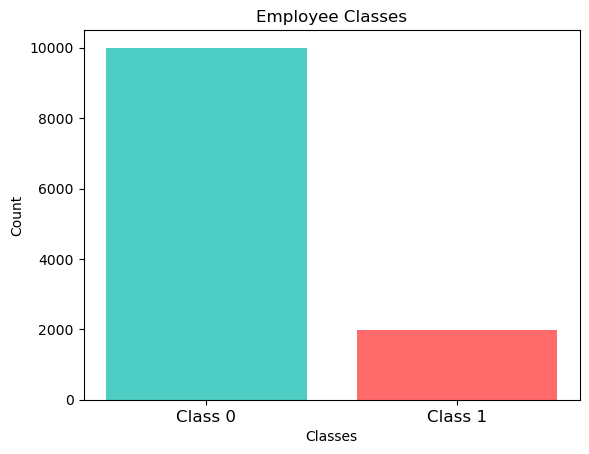

In [35]:
colors = ['#4ECDC4','#FF6B6B']
plt.bar(value_counts.index,value_counts.values,color=colors)
plt.title('Employee Classes')
plt.xlabel('Classes')
plt.xticks(ticks=[0, 1],labels=['Class 0', 'Class 1'],fontsize=12)
plt.ylabel('Count')
plt.show()

## Feature Selection

In [39]:
select=SelectKBest(score_func=f_classif,k=4)
best_features=select.fit_transform(X,y)
best_features=pd.DataFrame(best_features,columns=X.columns[select.get_support()])
best_features.head()

,satisfaction_level,time_spend_company,Work_accident,salary
0,0.38,3.0,0.0,0.0
1,0.80,6.0,0.0,1.0
2,0.11,4.0,0.0,1.0
3,0.72,5.0,0.0,0.0
4,0.37,3.0,0.0,0.0


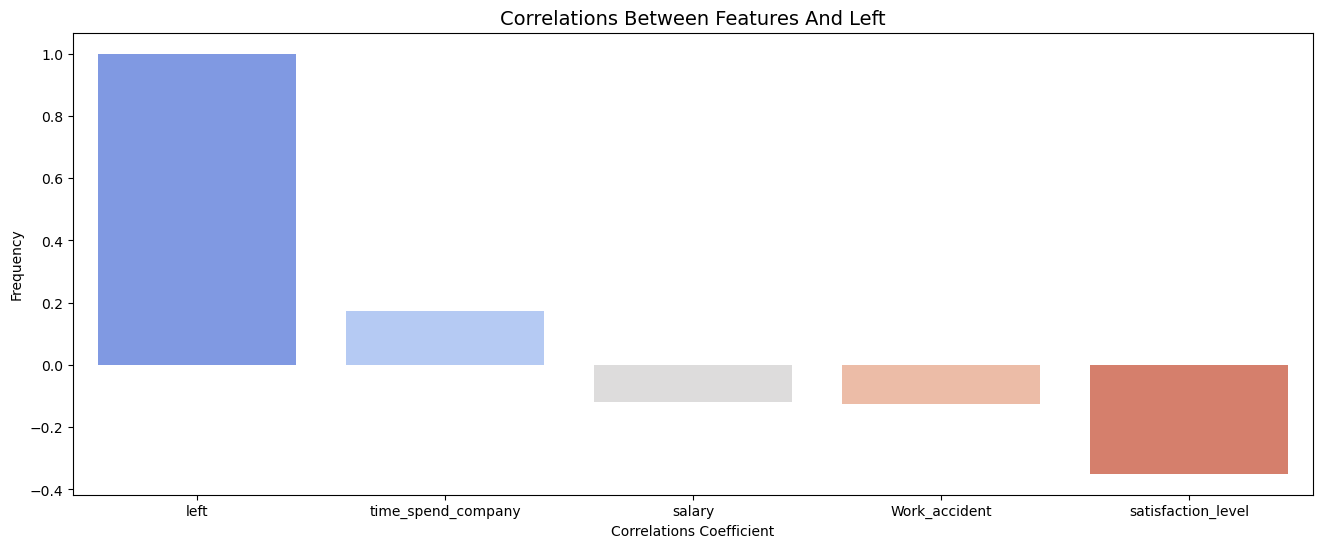

In [41]:
mydata=best_features.copy()
mydata['left']=y
corrleation_matrix=mydata.corr()
corrleation_matrix_left=corrleation_matrix.left.sort_values(ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(x=corrleation_matrix_left.index,y=corrleation_matrix_left.values,palette='coolwarm',hue=corrleation_matrix_left.index,legend=False)
plt.title('Correlations Between Features And Left',fontsize=14)
plt.xlabel("Correlations Coefficient")
plt.ylabel('Frequency')
plt.show()

## Split DataSet Train and Test

In [43]:
x_train,x_test,y_train,y_test=tts(best_features,y,test_size=.20,random_state=30,shuffle=True)

## Feature Scaling

In [45]:
scaler=MinMaxScaler(feature_range=(0,1))
x_train_scalled=scaler.fit_transform(x_train)
x_test_scalled=scaler.fit_transform(x_test)
x_train_scalled=pd.DataFrame(x_train_scalled,columns=X.columns[select.get_support()])
x_test_scalled=pd.DataFrame(x_test_scalled,columns=X.columns[select.get_support()])

## Data Column Visualization

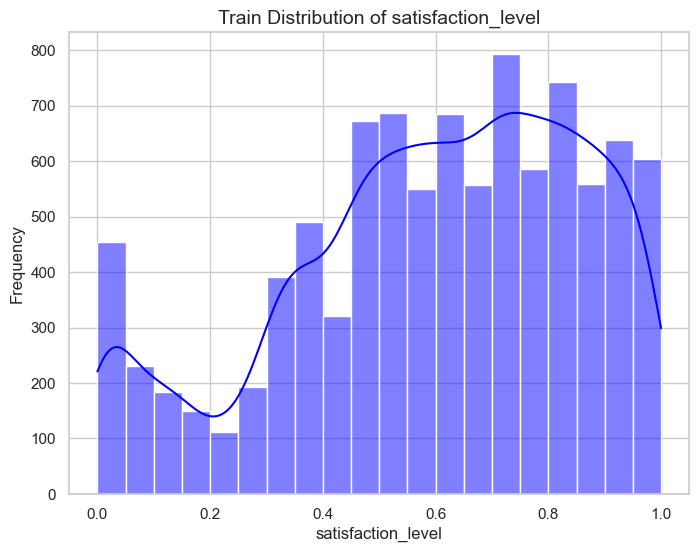

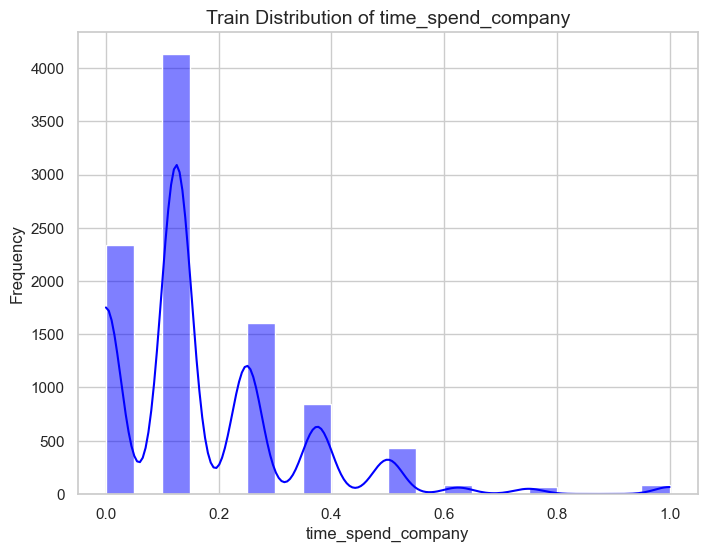

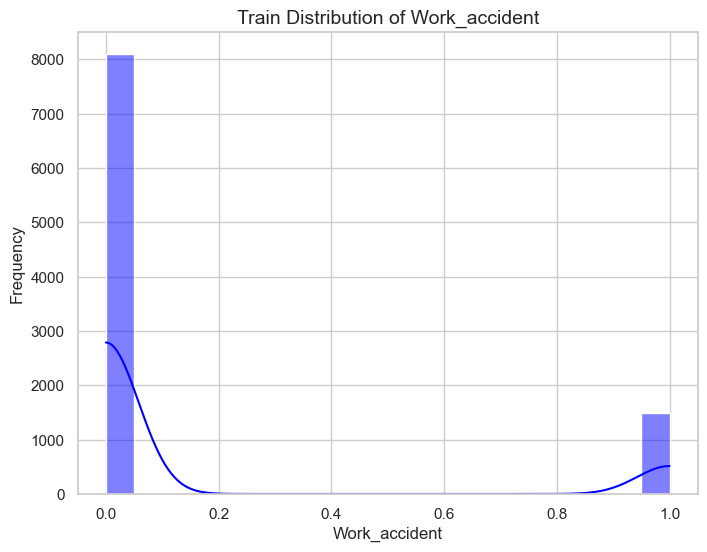

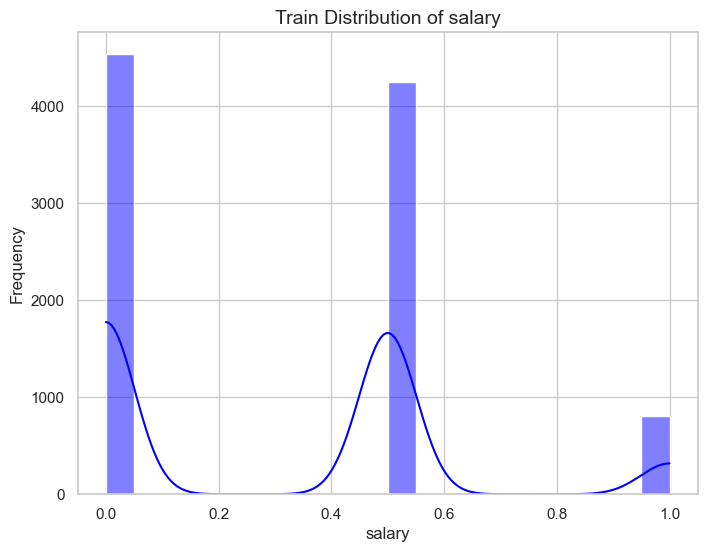

In [47]:
sns.set(style='whitegrid')
for column in x_train_scalled.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(x_train_scalled[column],kde=True,bins=20,color='blue')
    plt.title(f'Train Distribution of {column}',fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

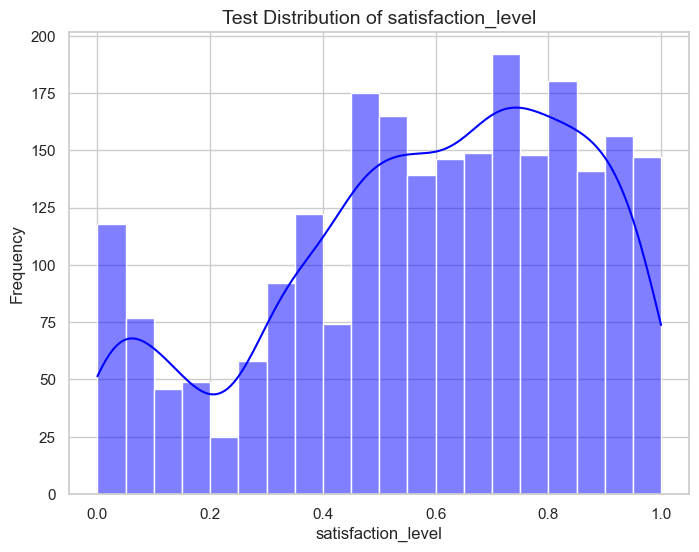

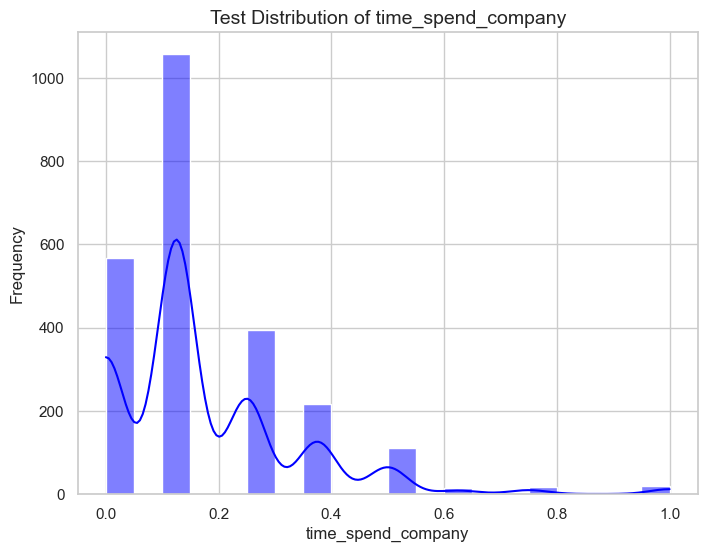

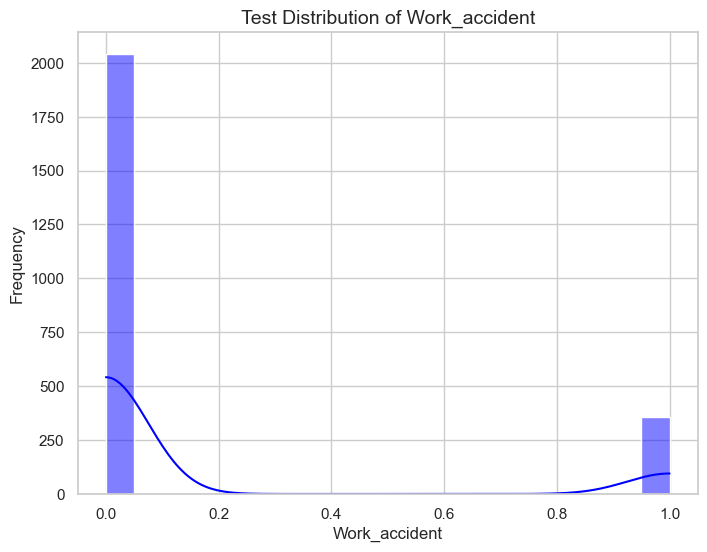

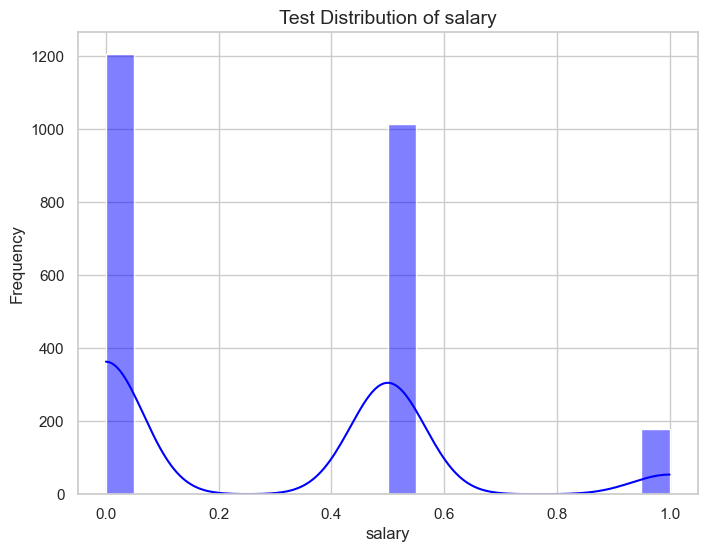

In [51]:
sns.set(style='whitegrid')
for column in x_test_scalled.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(x_test_scalled[column],kde=True,bins=20,color='blue')
    plt.title(f'Test Distribution of {column}',fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## DecisionTree Train

In [49]:
# tree_classifier=DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
tree_classifier=DecisionTreeClassifier()
tree_classifier.fit(x_train_scalled,y_train)

DecisionTreeClassifier()

In [53]:
y_pred=tree_classifier.predict(x_test_scalled)

In [71]:
text_representation = export_text(tree_classifier)
print(text_representation)

|--- feature_0 <= 0.41
|   |--- feature_0 <= 0.03
|   |   |--- class: 1
|   |--- feature_0 >  0.03
|   |   |--- feature_0 <= 0.29
|   |   |   |--- feature_1 <= 0.44
|   |   |   |   |--- feature_3 <= 0.25
|   |   |   |   |   |--- feature_0 <= 0.24
|   |   |   |   |   |   |--- feature_1 <= 0.31
|   |   |   |   |   |   |   |--- feature_0 <= 0.07
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  0.06
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |  

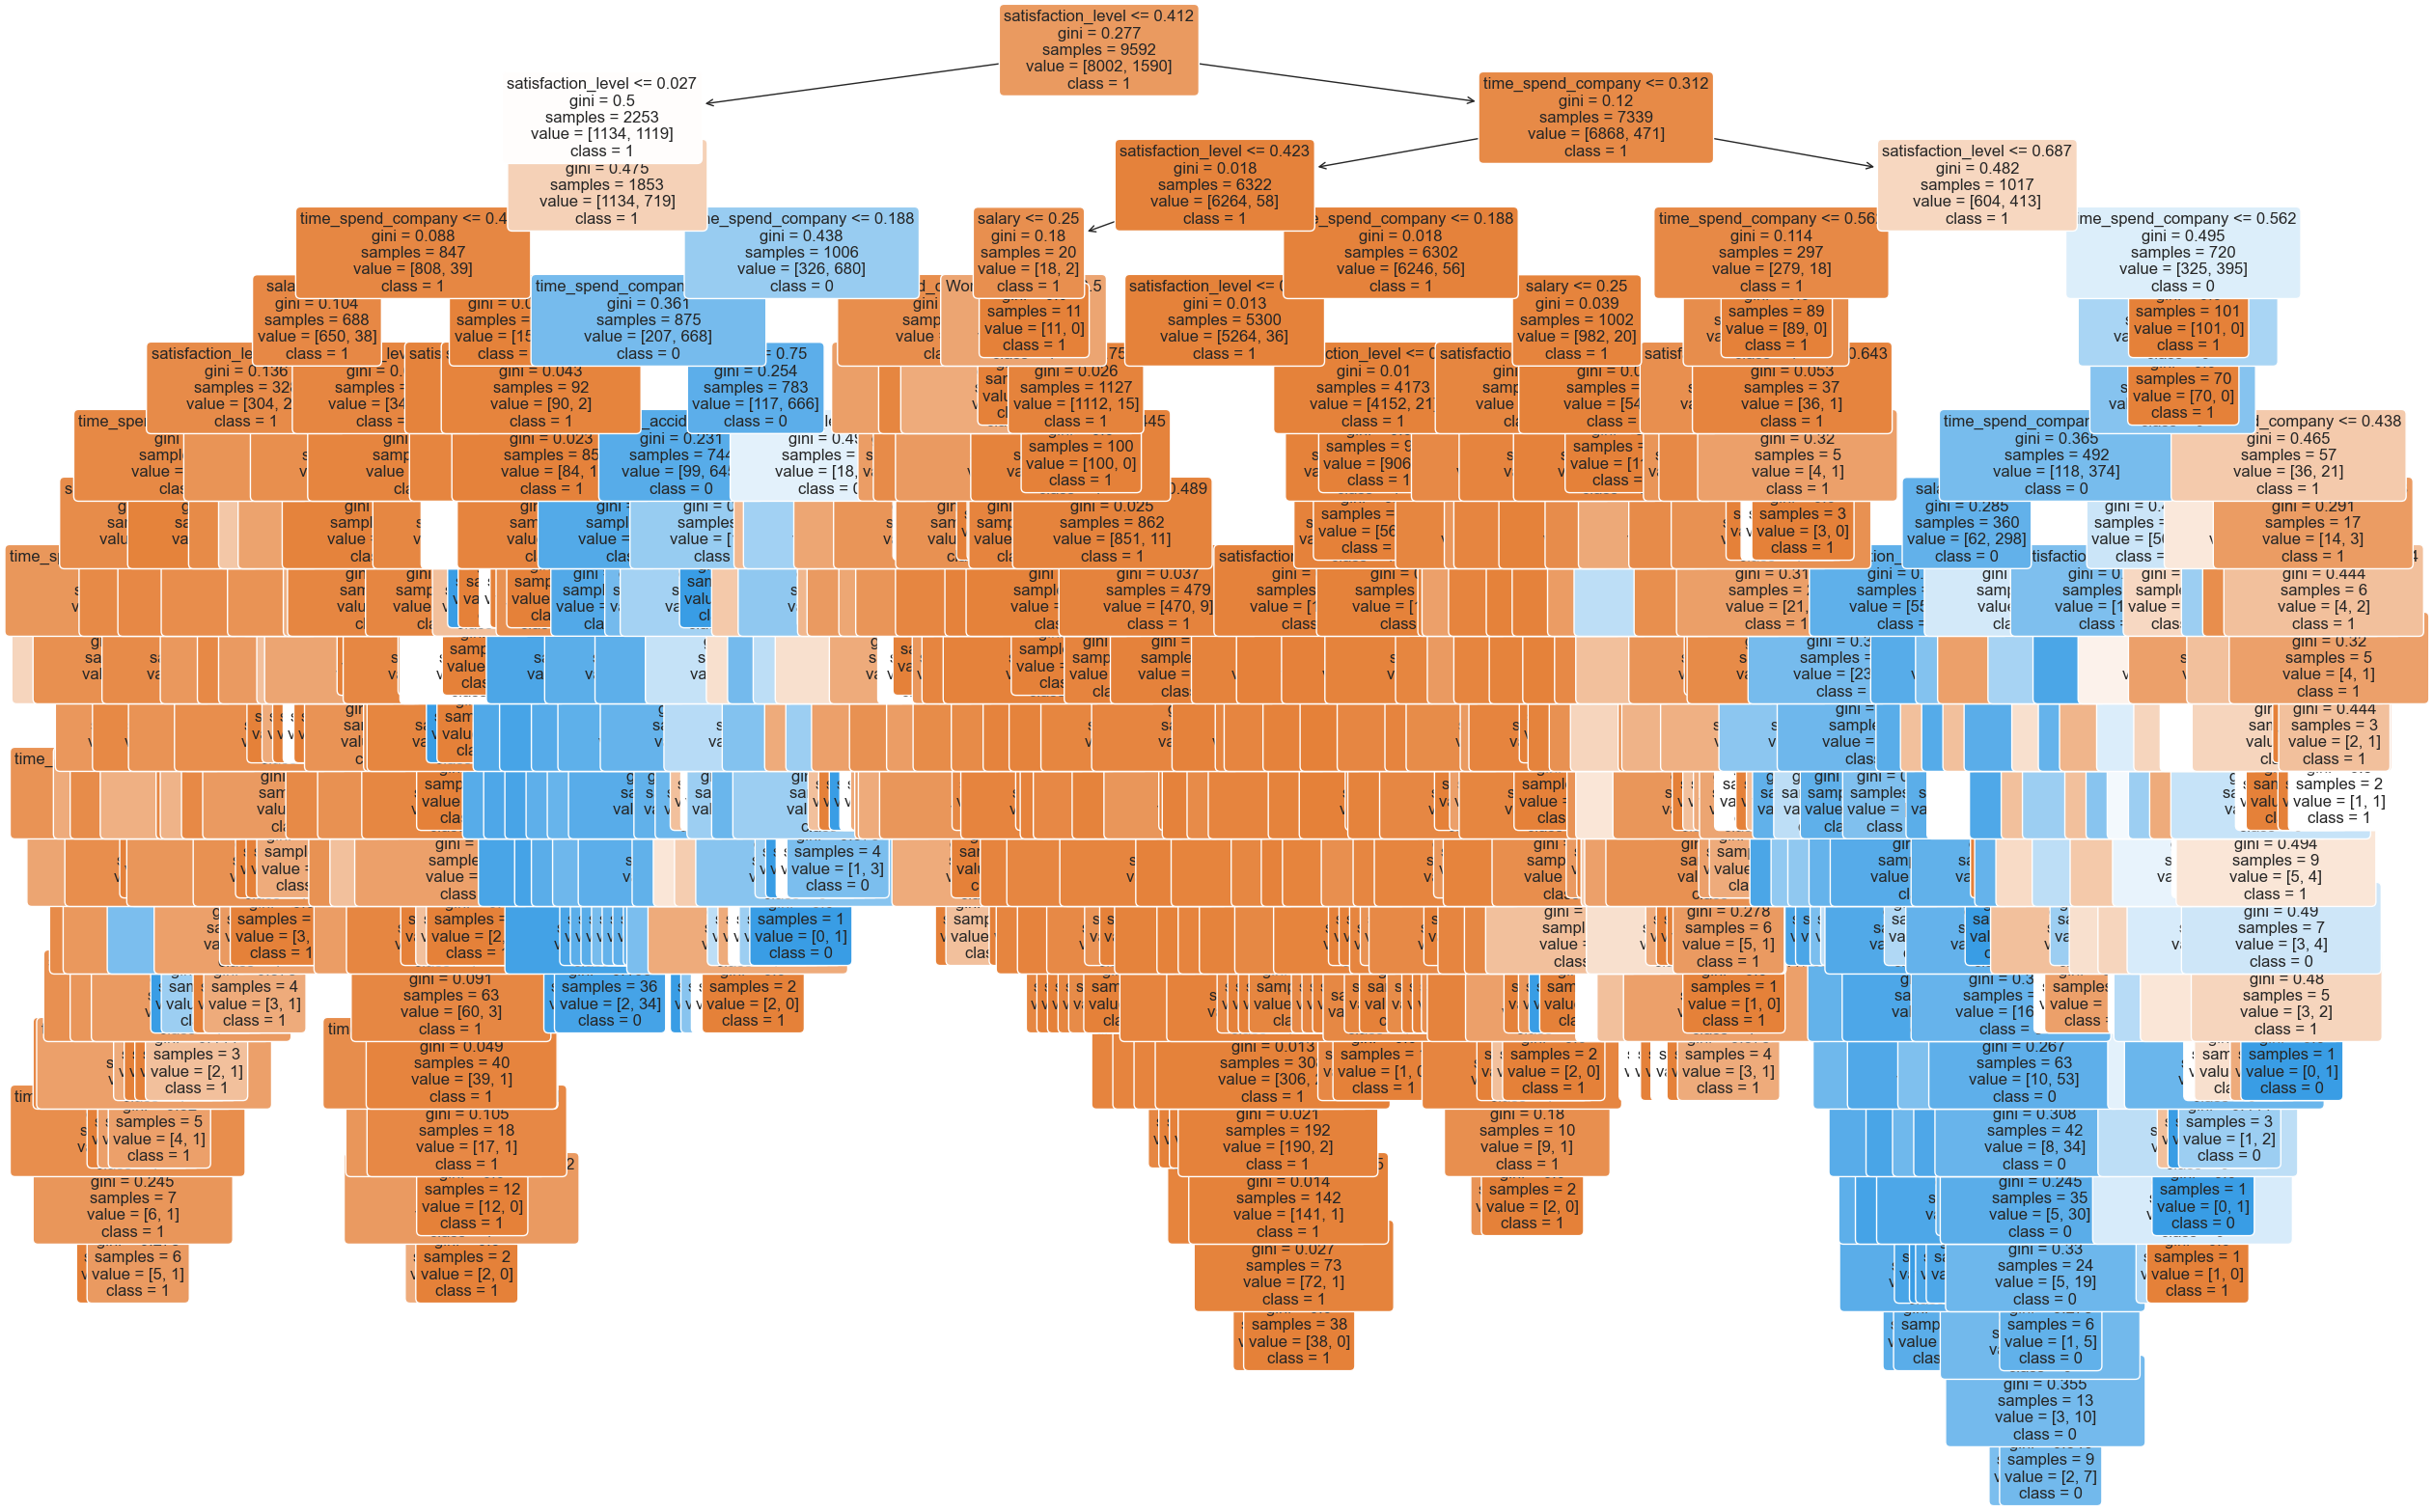

In [87]:
feature_names = best_features.columns.tolist()
target_names = [str(name) for name in y.unique().tolist()]
plt.figure(figsize=(30, 20))
plot_tree(tree_classifier, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True,
         fontsize=12)

plt.savefig('tree_visualization.png') 

## Model Evaluation

In [55]:
matrix=confusion_matrix(y_pred,y_test)
matrix

array([[1944,   50],
       [  54,  351]], dtype=int64)

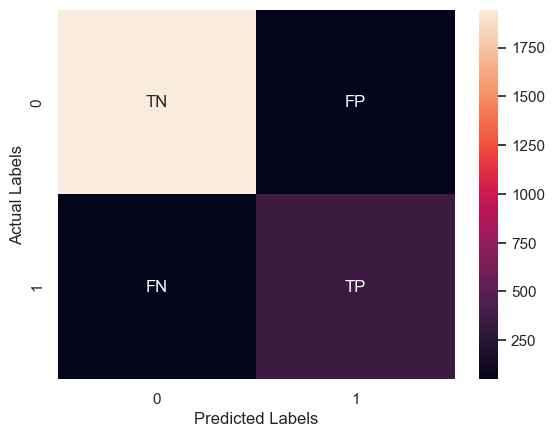

In [57]:
labels = np.array([["TN", "FP"], ["FN", "TP"]])
sns.heatmap(matrix, annot=labels, fmt="", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.savefig('Conf_matrix.png')

### Accuracy_Score
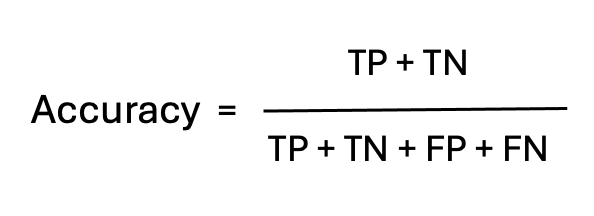

In [59]:
accuracy_score(y_pred,y_test)

0.9566486035848271

### Precision Score:
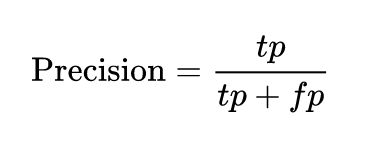

In [61]:
precision_score(y_pred,y_test)

0.8753117206982544

### Recall Score:
![My Image](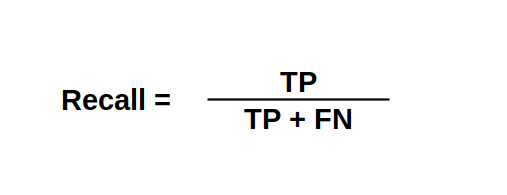
)

In [63]:
recall_score(y_pred,y_test)

0.8666666666666667

In [65]:
f1_score(y_pred,y_test)

0.8709677419354839

In [75]:
input_data = pd.DataFrame([[0.01,0.04,0.5,0.02]], columns=best_features.columns)
prediction = tree_classifier.predict(input_data)
print("Prediction:", prediction)

Prediction: [1]


## Save The Model

In [89]:
pk.dump(tree_classifier , open('tree_classifier_model.pkl','wb'))

In [91]:
savedmodel = pk.load(open('tree_classifier_model.pkl','rb'))

In [93]:
input_data = pd.DataFrame([[0.9,0.7,0.5,0.02]], columns=best_features.columns)
prediction = savedmodel.predict(input_data)
print("Prediction:", prediction)

Prediction: [0]
